# 1. 데이터 생성
- 남자, 여자 데이터 생성 군집화

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [14]:
random.randint(40,70) # 40 ~ 70 중 하나

67

In [19]:
data = []
for i in range(50):
    data.append([random.randint(40,70),random.randint(140, 175)]) # 여자
    data.append([random.randint(60,110),random.randint(170, 200)]) # 남자

In [29]:
# 여자
for female in data[:100:2]:
    print(female, end=' ')
print()
print('-------------------------------------------------------------------')
for male in data [1:100:2]:
    print(male, end=' ')

[60, 159] [66, 155] [68, 162] [58, 145] [51, 141] [70, 156] [52, 142] [44, 164] [53, 140] [53, 172] [59, 158] [65, 141] [54, 149] [43, 141] [55, 173] [63, 162] [42, 149] [45, 168] [64, 170] [61, 143] [56, 168] [51, 144] [56, 150] [55, 157] [46, 156] [54, 141] [50, 161] [47, 150] [60, 153] [54, 156] [56, 158] [68, 167] [67, 175] [43, 149] [49, 141] [64, 162] [56, 160] [57, 145] [52, 160] [45, 153] [41, 151] [56, 167] [43, 167] [68, 159] [65, 164] [70, 158] [62, 150] [68, 149] [50, 163] [44, 161] 
-------------------------------------------------------------------
[84, 175] [63, 182] [106, 185] [71, 181] [105, 191] [68, 184] [88, 185] [105, 184] [78, 186] [66, 193] [84, 187] [100, 188] [108, 197] [105, 182] [88, 182] [90, 179] [86, 184] [73, 180] [108, 173] [64, 196] [91, 189] [108, 200] [98, 178] [81, 173] [82, 173] [85, 175] [104, 188] [68, 180] [94, 190] [94, 192] [99, 179] [85, 194] [100, 187] [60, 200] [78, 189] [98, 192] [95, 192] [103, 196] [108, 179] [91, 177] [64, 178] [86, 173]

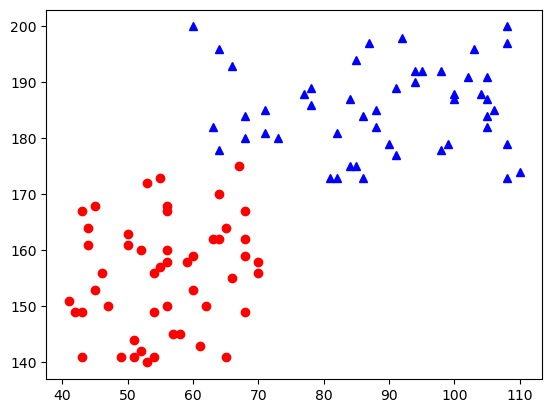

In [37]:
# x : 몸무게, y : 키
# print('여자 몸무게 :', [d[0] for d in data[:100:2]])
# print('여자 신장 :', [d[1] for d in data[:100:2]])
# print('남자 몸무게 :', [d[0] for d in data[1:100:2]])
# print('남자 신장 :', [d[1] for d in data[1:100:2]])
plt.plot(
    [d[0] for d in data[:100:2]],
    [d[1] for d in data[:100:2]],
    'o', color='r'
        )
plt.plot(
    [d[0] for d in data[1:100:2]],
    [d[1] for d in data[1:100:2]],
    '^', color='b'
        )
plt.show()

# 2. 군집화 로직

In [38]:
# 초기 랜덤 지점 2개 (40~110, 140~200)
random_points = [[random.randint(40,110),random.randint(140,200)],
                 [random.randint(40,110), random.randint(140,200)]]
print('초기 랜덤 기준점 :', random_points)

초기 랜덤 기준점 : [[53, 185], [56, 175]]


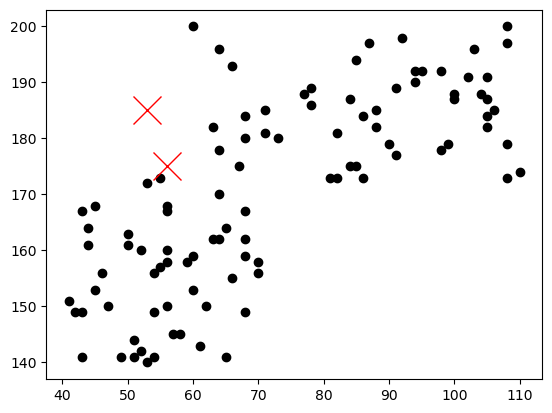

In [55]:
plt.plot([d[0] for d in data], [d[1] for d in data], 'o', color='k')
plt.plot(random_points[0][0], random_points[0][1], 'x', color='r', markersize=20)
plt.plot(random_points[1][0], random_points[1][1], 'x', color='r', markersize=20)
plt.show()

In [56]:
# 두 점 사이의 거리를 구하는 함수
def dist(a, b):
    return np.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)
dist([1,1], [4,5])

5.0

In [57]:
dist(random_points[0], random_points[1])

10.44030650891055

In [58]:
# random_points[0]과 random_points[1]을 기준으로 두 영역을 나눔
group0 = [] # random_points[0]이 더 가까운 group
group1 = [] # random_points[1]이 더 가까운 group
for d in data:
    if dist(random_points[0], d) <= dist(random_points[1], d):
        group0.append(d)
    else:
        group1.append(d)
len(group0), len(group1)

(13, 87)

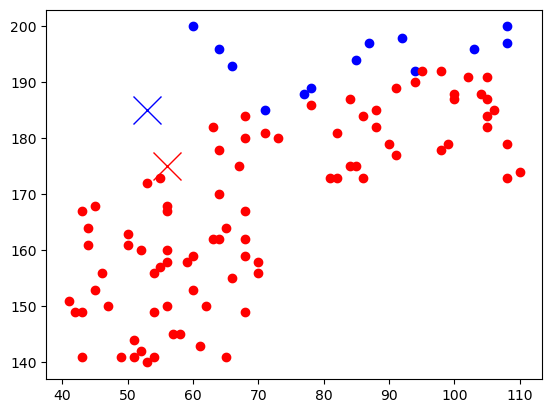

In [60]:
plt.plot(random_points[0][0], random_points[0][1], 'x', color='b', markersize=20)
plt.plot(random_points[1][0], random_points[1][1], 'x', color='r', markersize=20)
plt.plot([d[0] for d in group0], [d[1] for d in group0], 'o', color='b')
plt.plot([d[0] for d in group1], [d[1] for d in group1], 'o', color='r')

In [63]:
print('초기 랜덤 지점 :', random_points)
# group0의 중심점과 group1의 중심점으로 만들어진 new_points 할당
sum_x=0; sum_y=0
for g in group0:
    sum_x += g[0]
    sum_y += g[1]
new_points = []
new_points.append([sum_x/len(group0),sum_y/len(group0)])
sum_x=0; sum_y=0
for g in group1:
    sum_x += g[0]
    sum_y += g[1]
new_points.append([sum_x/len(group1),sum_y/len(group1)])
print('새로운 기준점 :', new_points)

초기 랜덤 지점 : [[53, 185], [56, 175]]
새로운 기준점 : [[84.07692307692308, 194.23076923076923], [70.39080459770115, 167.0]]


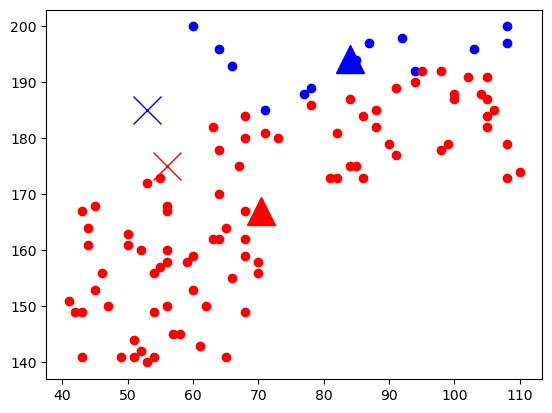

In [65]:
plt.plot(random_points[0][0], random_points[0][1], 'x', color='b', markersize=20)
plt.plot(random_points[1][0], random_points[1][1], 'x', color='r', markersize=20)
plt.plot([d[0] for d in group0], [d[1] for d in group0], 'o', color='b')
plt.plot([d[0] for d in group1], [d[1] for d in group1], 'o', color='r')
plt.plot(new_points[0][0], new_points[0][1], '^', color='b', markersize=20)
plt.plot(new_points[1][0], new_points[1][1], '^', color='r', markersize=20)

In [66]:
# new_points[0]과 new_points[1]을 두 영역으로 나눔
group0 = []
group1 = []
for d in data:
    if dist(new_points[0], d) <= dist(new_points[1], d):
        group0.append(d)
    else:
        group1.append(d)
len(group0), len(group1)

(39, 61)

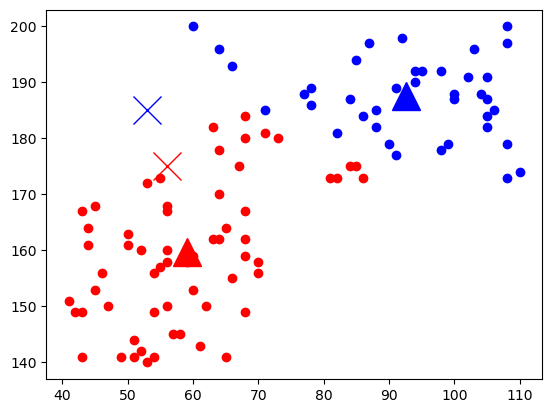

In [68]:
plt.plot(random_points[0][0], random_points[0][1], 'x', color='b', markersize=20)
plt.plot(random_points[1][0], random_points[1][1], 'x', color='r', markersize=20)
plt.plot([d[0] for d in group0], [d[1] for d in group0], 'o', color='b')
plt.plot([d[0] for d in group1], [d[1] for d in group1], 'o', color='r')
plt.plot(new_points[0][0], new_points[0][1], '^', color='b', markersize=20)
plt.plot(new_points[1][0], new_points[1][1], '^', color='r', markersize=20)

# 3. 전체코드(for문 사용)

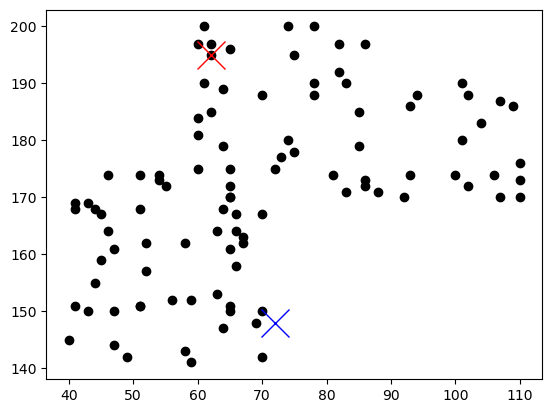

1 번째 기준점 [[72, 148], [62, 195]]
2 번째 기준점 [[68.07692307692308, 160.17307692307693], [70.95833333333333, 183.79166666666666]]
3 번째 기준점 [[55.645833333333336, 158.77083333333334], [82.21153846153847, 183.26923076923077]]
4 번째 기준점 [[55.88235294117647, 159.7058823529412], [83.59183673469387, 183.79591836734693]]
5 번째 기준점 [[55.96153846153846, 160.1153846153846], [84.08333333333333, 183.85416666666666]]
6 번째 기준점 [[56.113207547169814, 160.47169811320754], [84.51063829787235, 183.95744680851064]]
7 번째 기준점 [[56.18518518518518, 160.90740740740742], [85.04347826086956, 183.95652173913044]]
8 번째 기준점 [[56.18518518518518, 160.90740740740742], [85.04347826086956, 183.95652173913044]]
9 번째 기준점 [[56.18518518518518, 160.90740740740742], [85.04347826086956, 183.95652173913044]]
10 번째 기준점 [[56.18518518518518, 160.90740740740742], [85.04347826086956, 183.95652173913044]]


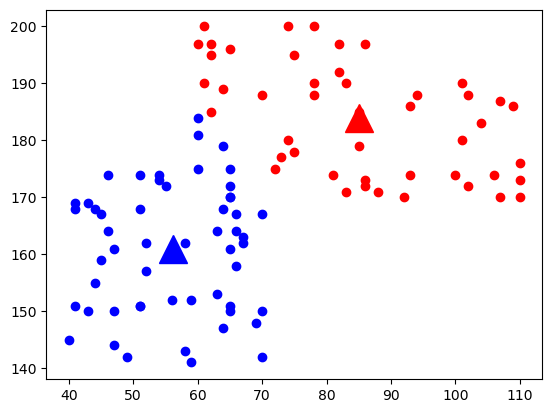

In [88]:
def dist(a, b):
    return np.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)
data = []
for i in range(50):
    data.append([random.randint(40,70),random.randint(140, 175)]) # 여자
    data.append([random.randint(60,110),random.randint(170, 200)]) # 남자

points = [[random.randint(40,110),random.randint(140,200)],
         [random.randint(40,110), random.randint(140,200)]]

plt.plot([d[0] for d in data], [d[1] for d in data], 'o', color='k')
plt.plot(points[0][0], points[0][1], 'x', color='b', markersize=20)
plt.plot(points[1][0], points[1][1], 'x', color='r', markersize=20)
plt.show()

for i in range(10):
    print(i+1, '번째 기준점', points)
    group0 = [] 
    group1 = [] 
    for d in data:
        if dist(points[0], d) <= dist(points[1], d):
            group0.append(d)
        else:
            group1.append(d)
    
    points = []
    sum_x=0; sum_y=0
    for g in group0:
        sum_x += g[0]
        sum_y += g[1]
    points.append([sum_x/len(group0),sum_y/len(group0)])
    sum_x=0; sum_y=0
    for g in group1:
        sum_x += g[0]
        sum_y += g[1]
    points.append([sum_x/len(group1),sum_y/len(group1)])

plt.plot([d[0] for d in group0], [d[1] for d in group0], 'o', color='b')
plt.plot([d[0] for d in group1], [d[1] for d in group1], 'o', color='r')
plt.plot(points[0][0], points[0][1], '^', color='b', markersize=20)
plt.plot(points[1][0], points[1][1], '^', color='r', markersize=20)
plt.show()

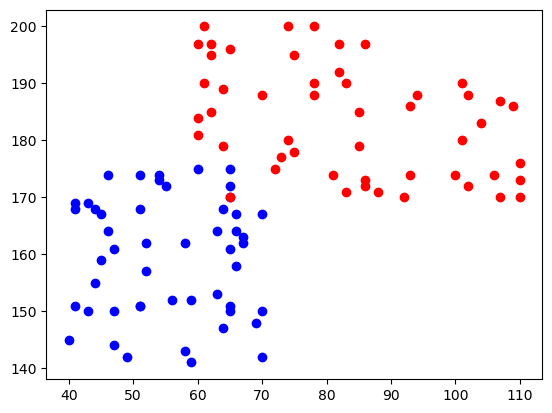

In [89]:
plt.plot([d[0] for d in data[:100:2]],[d[1] for d in data[:100:2]], 'o', color='b')
plt.plot([d[0] for d in data[1:100:2]],[d[1] for d in data[1:100:2]], 'o', color='r')

# 4. api(sklearn) 이용한 군집분석
- sklearn : 머신러닝 패키지

In [90]:
from sklearn.cluster import KMeans
data = np.array(data)
model = KMeans(n_clusters=2, # 2개 그룹으로 군집분석
               init='random',
               n_init=10,
               random_state=42)
model.fit(data)

C:\Users\4545\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(init='random', n_clusters=2, n_init=10, random_state=42)

In [91]:
model.cluster_centers_ # 최종 중심점

array([[ 56.18518519, 160.90740741],
       [ 85.04347826, 183.95652174]])

In [92]:
model.labels_

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1])

In [96]:
model.predict(np.array([[62,173],[99,199]]))

array([0, 1])

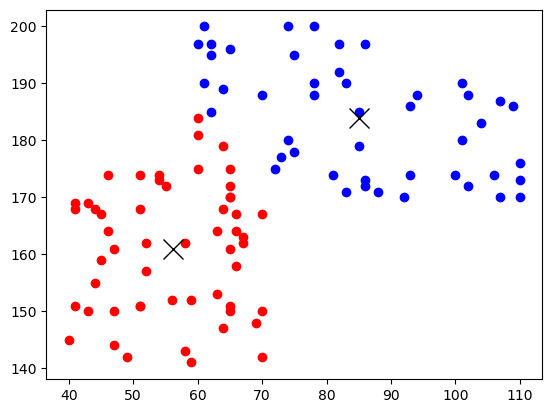

In [103]:
# print('모델의 0번 group의 x값', data[model.labels_==0, 0])
# print('모델의 0번 group의 y값', data[model.labels_==0, 1])
# print('모델의 1번 group의 x값', data[model.labels_==1, 0])
# print('모델의 1번 group의 y값', data[model.labels_==1, 1])
plt.plot(data[model.labels_==0, 0], data[model.labels_==0, 1], 'o', color='r')
plt.plot(data[model.labels_==1, 0], data[model.labels_==1, 1], 'o', color='b')
plt.plot(model.cluster_centers_[0][0], model.cluster_centers_[0][1], 'x', color='k', markersize = 15)
plt.plot(model.cluster_centers_[1][0], model.cluster_centers_[1][1], 'x', color='k', markersize = 15)
plt.show()